In [2]:
import pandas as pd
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation.writer')

plt.style.use('ggplot')

# ubuntu
path = r'/home/patrick/projekte/Hamiltonian-Neural-Network/data/traces/trace_01'

# windows
# path = r'c:\Users\Envy\projekte\Hamiltonian-Neural-Network\traces\trace_01.csv'

traces = pd.read_csv(path, sep=';', header=None)

# set header
#traces.columns = ["x1", "y1", "z1", "px1", "py1", "pz1", "x2", "y2", "z2", "px2", "py2", "pz2"]
traces.head()

,0,1,2,3,4,5,6,7,8,9,10
0,15.000000,15.000000,0.0,-1.000000,0.000000,0.000000-15.000000,-15.000000,0.0,1.000000,0.000000,0.0
1,14.495833,14.995833,0.0,-1.008333,-0.008333,0.000000-14.495833,-14.995833,0.0,1.008333,0.008333,0.0
2,13.987501,14.987358,0.0,-1.016664,-0.016952,0.000000-13.987501,-14.987358,0.0,1.016664,0.016952,0.0
3,13.475009,14.974424,0.0,-1.024985,-0.025867,0.000000-13.475009,-14.974424,0.0,1.024985,0.025867,0.0
4,12.958366,14.956879,0.0,-1.033286,-0.035092,0.000000-12.958366,-14.956879,0.0,1.033286,0.035092,0.0


In [17]:
# define some vector functions
def vec3f_sub(a, b):
    c0 = a[0] - b[0]
    c1 = a[1] - b[1]
    c2 = a[2] - b[2]
    return [c0,c1,c2]
    
def vec3f_add(a, b):
    c0 = a[0] + b[0]
    c1 = a[1] + b[1]
    c2 = a[2] + b[2]
    return [c0,c1,c2]    

def vec3f_mul(a, b):
    c0 = a[0] * b[0]
    c1 = a[1] * b[1]
    c2 = a[2] * b[2]
    return [c0,c1,c2]

def vec3f_sum(a):
    return a[0] + a[1] + a[2]

def vec3f_scalar(k, a):
    return [k * a[0], k * a[1], k * a[2]]

def euclidian(a):
    return (vec3f_sum(vec3f_mul(a, a)))**(1./2)

In [38]:
def particle_force(i, j, vec3f_pos1, vec3f_pos2, vec3f_force1, vec3f_force2):
    
    # compute distance between particle j and i
    
    #print('vec3f_pos1: ', vec3f_pos1)
    #print('vec3f_pos2: ', vec3f_pos2)
    vec3f_distance = vec3f_sub(vec3f_pos2, vec3f_pos1)
    #print('vec3f_distance: ', vec3f_distance)
    
    euclidianf = euclidian(vec3f_distance)
    #print('euclidianf: ', euclidianf)
    
    vec3f_distance_normed = vec3f_scalar(1.0 / euclidianf, vec3f_distance)
    #print('vec3f_distance_normed: ', vec3f_distance_normed)
    
    force = vec3f_scalar(G * 1.0 * 1.0 / (euclidianf * euclidianf), vec3f_distance_normed)
    #print('force: ', force)    
    
    # update force of particle 1
    vec3f_force1 = vec3f_add(vec3f_force1, force)
    # update force of particle 2
    vec3f_force2 = vec3f_sub(vec3f_force2, force) 
    
    return vec3f_force1, vec3f_force2

In [39]:
# define some paramters
DIMENSIONS = 2
TIME_MAX = 10
TIME_STEP = 0.1
PARTICLE_COUNT = 2
G = 1.
ITERATIONS = 100


positions = np.zeros((ITERATIONS+1, 3 * PARTICLE_COUNT))
momentum = np.zeros((ITERATIONS+1, 3 * PARTICLE_COUNT))
forces = np.zeros((ITERATIONS+1, 3 * PARTICLE_COUNT))

# define the algorithm of particle motion
def particle_move():
    pass

def particle_update():
    
    index = 0
    
    # intialize positions and momentum for the first time
    positions[index,0:3] = traces.iloc[0,0:3]
    momentum[index,0:3] = traces.iloc[0,3:6]
    positions[index,3:6] = traces.iloc[0,6:9]
    momentum[index,3:6] = traces.iloc[0,9:12]
    
    #print('-------------> ITERATION: 0 (inital)'.format(index))
    #print('position array')
    #print(np.round(positions[index,:],6))
    #print('momentum array')
    #print(np.round(momentum,6))
    #print('forces array')
    #print(np.round(forces[index,:],6))
    #print('##############################################')
    
    
    while(True):     

        if index == ITERATIONS:
            break
            
        #print('-------------> ITERATION: {}'.format(index+1))
    
        # first, compute gravitational force acting on each particle 
        for i in range(PARTICLE_COUNT):
            for j in range(i):
                
                pos1 = positions[index,0:3]
                pos2 = positions[index,3:6]
                
                force1 = forces[index,0:3]
                force2 = forces[index,3:6]
                
                forces[index,0:3], forces[index,3:6] = particle_force(i, j, pos1, pos2, force1, force2)
        
        
        
        # next, compute nuew position
        for i in range(PARTICLE_COUNT):
            
            begin = 3 * i
            end = 3 * i + 3
            
            r_old = positions[index,begin:end]
            p_old = momentum[index,begin:end]
            #print('p_old: ', p_old)
            force = forces[index,begin:end]
            p_new = force * TIME_STEP
            r_new = r_old + TIME_STEP / 1.0 * (p_old + p_new)
            #print('r_new: ', r_new)
            
            positions[index+1,begin:end] = r_new
            
            momentum[index+1,begin:end] = vec3f_add(p_old, p_new)
            
        #print('position array')
        #print(np.round(positions[index+1,:],6))
        #print('momentum array')
        #print(np.round(momentum,6))
        #print('forces array')
        #print(np.round(forces[index+1,:],6))
        #print('##############################################')

        index += 1   
            

particle_update()

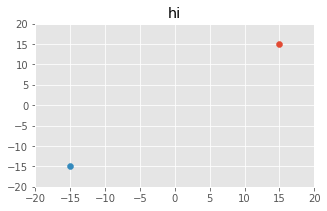

In [40]:
# set up the plotting area
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-20, 20), ylim=(-20, 20))

# create some data to plot
x1 = positions[0,0]
y1 = positions[0,1]
x2 = positions[0,0]
y2 = positions[0,1]

t = np.linspace(0,1,ITERATIONS)

# plot the first point
scat1 = ax.scatter(x1, y1)
scat2 = ax.scatter(x2, y2)

#reate a function to update the line
def animate(i):
    x1_i = positions[i,0]
    y1_i = positions[i,1]
    x2_i = positions[i,3]
    y2_i = positions[i,4]
    plt.title('hi')
    scat1.set_offsets(np.c_[x1_i, y1_i])
    scat2.set_offsets(np.c_[x2_i, y2_i])

# call FuncAnimation and show
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)

# export the animation
anim.save('animation.gif', writer='imagemagick')
